# Visualization

This notebook visualizes the PCam$^{1}$ dataset, retrieved from [Kaggle](https://www.kaggle.com/c/histopathologic-cancer-detection/).

**References:**

1. B. S. Veeling, J. Linmans, J. Winkens, T. Cohen, M. Welling. "Rotation Equivariant CNNs for Digital Pathology". arXiv:1806.03962

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
from torch.utils import data
from torchvision import datasets, transforms

import lib.histopathology as hcd

In [2]:
DATASET_PATH = '../data'

In [3]:
image_dir = os.path.join(DATASET_PATH, 'train')
csv_path = os.path.join(DATASET_PATH, 'train_labels.csv')
pcam_dataset = hcd.dataset.PCam(image_dir, csv_path, transforms.Compose([transforms.ToTensor()]))
train_loader = data.DataLoader(pcam_dataset, batch_size=50, num_workers=0)

In [4]:
print(f'PCam dataset has {len(pcam_dataset)} labeled images of shape {tuple(pcam_dataset[0][0].shape)}')

PCam dataset has 220025 labeled images of shape (3, 96, 96)


In [5]:
bins = np.linspace(0, 1, 11)
pos_buckets = np.zeros((3,10))
neg_buckets = np.zeros((3,10))
num_batches = len(train_loader)
for b, (images, labels) in enumerate(train_loader, start=1):
    labels = labels.flatten().numpy()
    pos_images = images[labels == 1].permute(1, 2, 3, 0).numpy().reshape((3,-1))
    neg_images = images[labels == 0].permute(1, 2, 3, 0).numpy().reshape((3,-1))
    # For each channel, compute the distibution of pixel intensities
    for i in range(3):
        pos_buckets[i] += np.histogram(pos_images[i], bins)[0]
        neg_buckets[i] += np.histogram(neg_images[i], bins)[0]
    # The last bin should include the maximum value (1.0)
    pos_buckets[:,-1] += np.sum(pos_images == 1.0, axis=1)
    neg_buckets[:,-1] += np.sum(neg_images == 1.0, axis=1)
    if b % 500 == 0:
        print(f'Batch[{b}/{num_batches}]: finished distibuting pixels')

Batch[500/4401]: finished distibuting pixels
Batch[1000/4401]: finished distibuting pixels
Batch[1500/4401]: finished distibuting pixels
Batch[2000/4401]: finished distibuting pixels
Batch[2500/4401]: finished distibuting pixels
Batch[3000/4401]: finished distibuting pixels
Batch[3500/4401]: finished distibuting pixels
Batch[4000/4401]: finished distibuting pixels


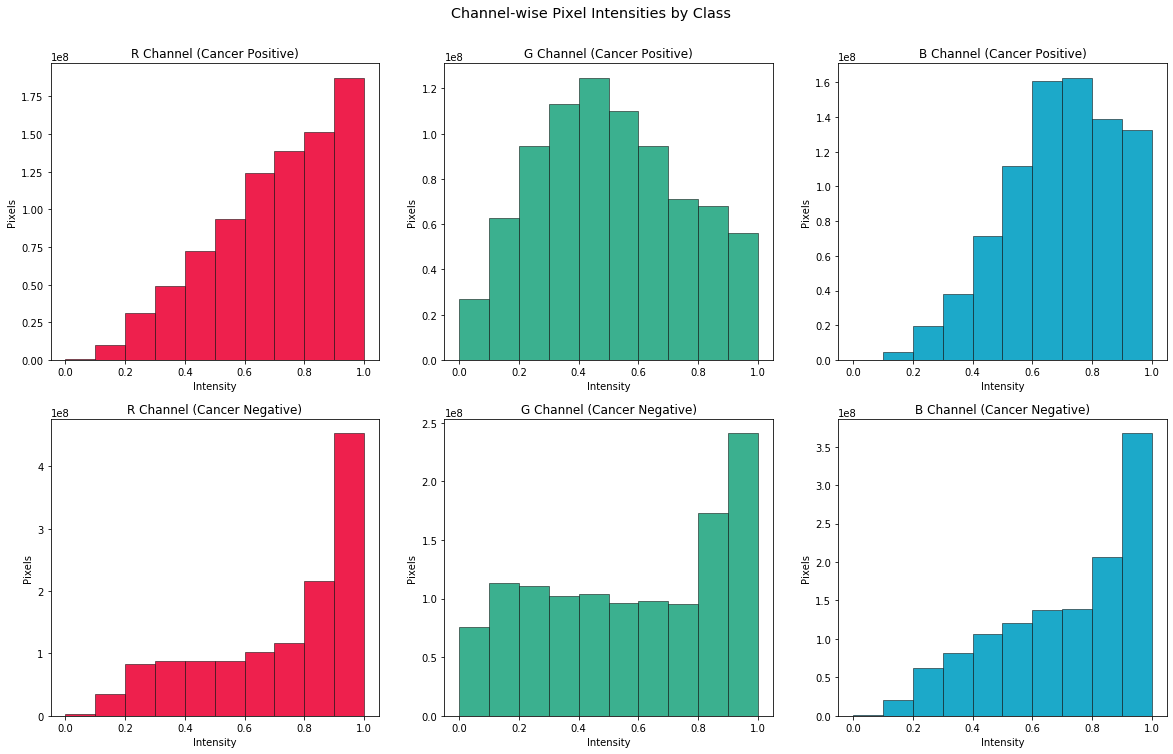

In [6]:
fig, ax = plt.subplots(2, 3, figsize=(20,12))
fig.suptitle('Channel-wise Pixel Intensities by Class', size='x-large', va='bottom', y=0.93)
for i, color in zip(range(3), ('#EE204D', '#3BB08F', '#1CA9C9')):
    ax[0,i].bar(bins[1:]-0.05, height=pos_buckets[i], width=0.1, color=color, lw=0.5, edgecolor='k')
    ax[1,i].bar(bins[1:]-0.05, height=neg_buckets[i], width=0.1, color=color, lw=0.5, edgecolor='k')
    ax[0,i].set_xlabel('Intensity')
    ax[0,i].set_ylabel('Pixels')
    ax[1,i].set_xlabel('Intensity')
    ax[1,i].set_ylabel('Pixels')
ax[0,0].set_title('R Channel (Cancer Positive)')
ax[1,0].set_title('R Channel (Cancer Negative)')
ax[0,1].set_title('G Channel (Cancer Positive)')
ax[1,1].set_title('G Channel (Cancer Negative)')
ax[0,2].set_title('B Channel (Cancer Positive)')
ax[1,2].set_title('B Channel (Cancer Negative)')
plt.savefig('../figures/channel_pixel_intensities_by_class.png')

<Figure size 432x288 with 0 Axes>

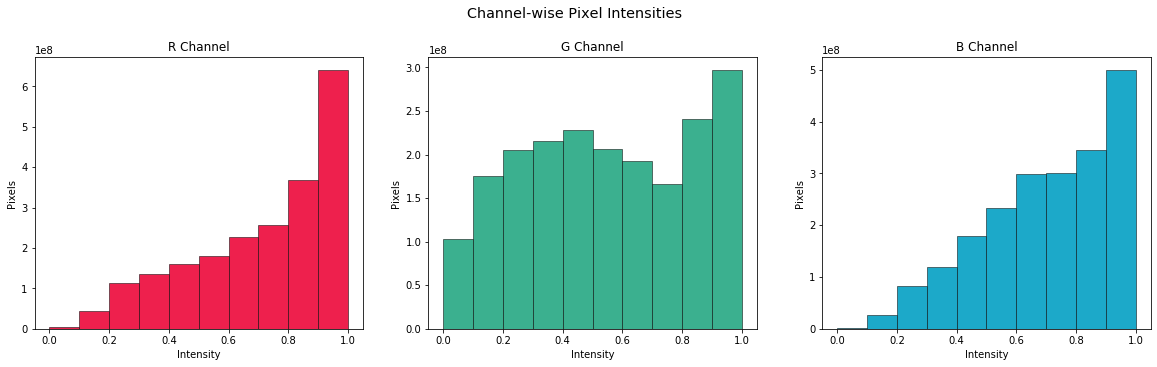

In [7]:
plt.subplots_adjust(hspace=0.3, wspace=0.5)
fig, ax = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Channel-wise Pixel Intensities', size='x-large', va='bottom')
for i, color in zip(range(3), ('#EE204D', '#3BB08F', '#1CA9C9')):
    ax[i].bar(bins[1:]-0.05, height=pos_buckets[i]+neg_buckets[i], width=0.1, color=color, lw=0.5, edgecolor='k')
    ax[i].set_xlabel('Intensity')
    ax[i].set_ylabel('Pixels')
ax[0].set_title('R Channel')
ax[1].set_title('G Channel')
ax[2].set_title('B Channel')
plt.savefig('../figures/channel_pixel_intensities.png')